In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Tech stocks in 2018**

Tech stocks, stocks in general, had an exceptionally volatile year. This is a brief review of this year in tech stocks.

In [4]:
tech_tickers = ['aapl', 'amzn', 'nflx', 'goog', 'fb', 'baba', 'msft', 'nvda', 'tsla']
months = ["January", "Febuary", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
tech_stocks = {}
for ticker in tech_tickers:
    tech_stocks[ticker] = pd.read_csv(ticker+'.csv').iloc[:-2]
    tech_stocks[ticker].set_index('date', inplace=True)

In [5]:
data = pd.DataFrame(columns= ['adj'])
for ticker, stock in tech_stocks.items():
    stock['change'] = (stock['close']-stock['open'])/stock['open']*100
    data.loc[ticker, 'vol'] = stock['volume'].mean()
    data.loc[ticker, 'min day move'] = min(stock['change'])
    data.loc[ticker, 'max day move'] = max(stock['change'])
    data.loc[ticker, 'yearly change']= (stock.iloc[0]['close']-stock.iloc[-1]['open'])/stock.iloc[-1]['close']*100

prices = pd.DataFrame((i['close'] for i in tech_stocks.values()),tech_tickers).T
monthly_prices= prices.reset_index()
monthly_prices['date'] = pd.to_datetime(monthly_prices['date'])
monthly_prices = monthly_prices.groupby(monthly_prices['date'].dt.strftime('%m')).mean()

**Monthly averages**

Stocks have generally peaked around the summer. The period from february to april witnessed some selling. The biggest sell-off was from october till the end of the year, with many stocks entering bear market (more on this later). 
Tesla's stock had a rough run, but ended the year quite well. 

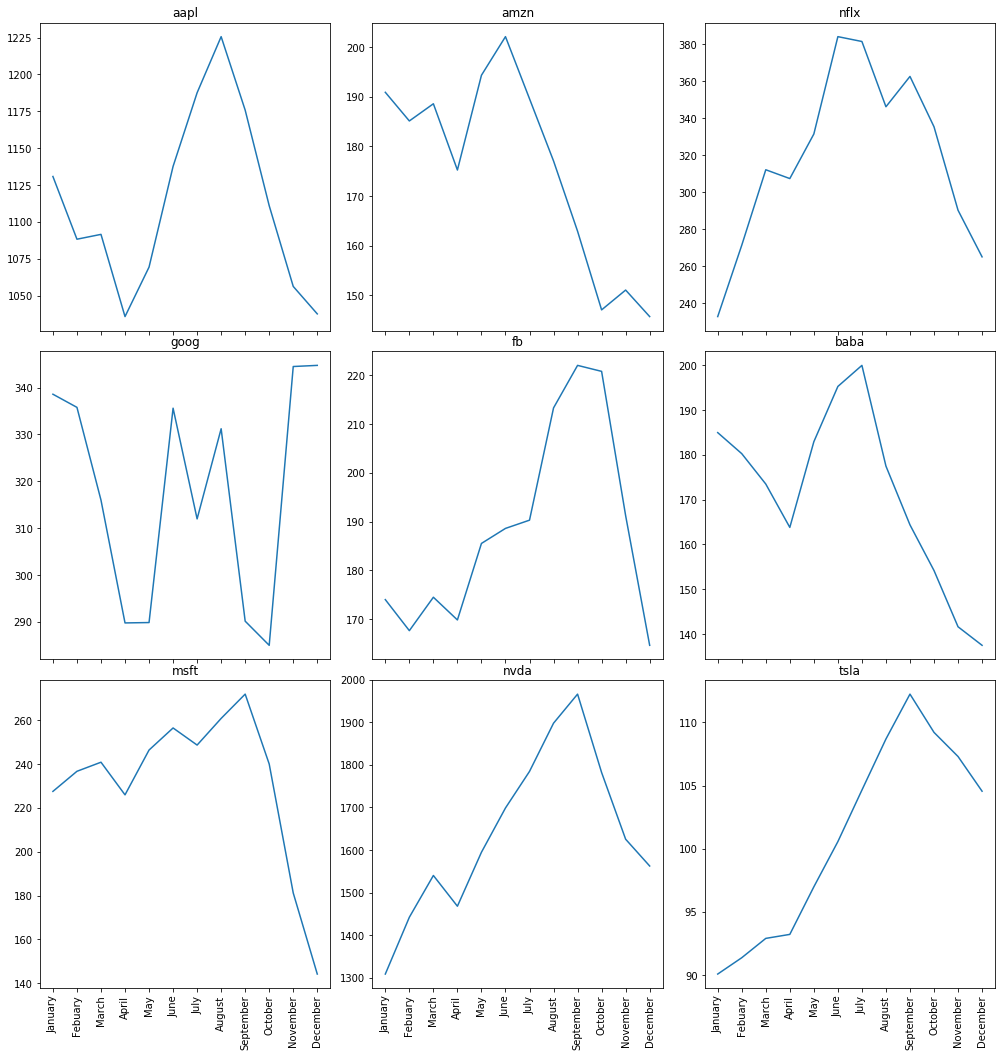

In [6]:
fig, ax = plt.subplots(3, 3, sharex=True, figsize=(14,14))
plt.tight_layout()
ax = ax.flatten()

for i, axis in enumerate(ax):
    axis.tick_params(axis='x', labelrotation=90)
    axis.title.set_text(prices.columns[i])
    axis.plot(months, monthly_prices.iloc[:,[i]])

**Performance over the year**

The period of selling in the alst quarter affected the stocks heavily. With many stocks ending the year in the negative territory.

<BarContainer object of 9 artists>

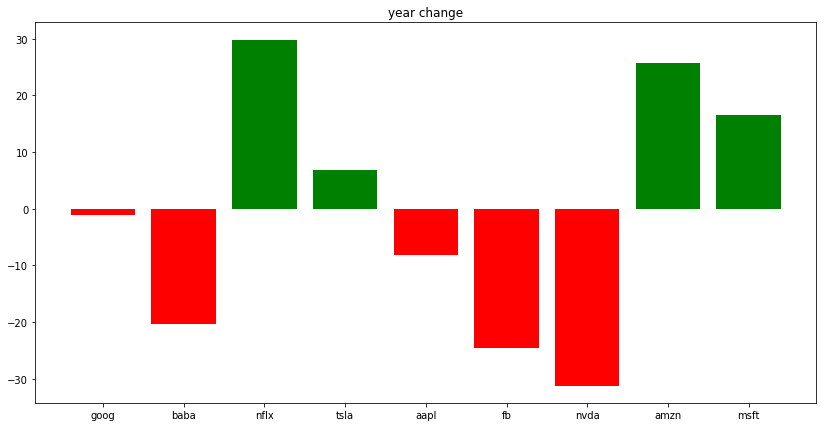

In [7]:
plt.figure(figsize=(14,7))
plt.axes().title.set_text('year change')
plt.bar(data.index, data['yearly change'], color= ['r' if  i == True else 'g' for i in (data['yearly change']<0)])

**Volatility**

This year witnessed a lot of voltaility. Stocks made major positive and negative moves. nflx and nvda were both noticeably volatile. 

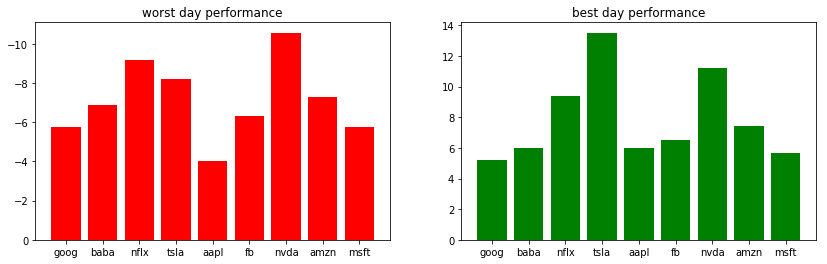

In [8]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
ax[0].bar(data.index,data['min day move'], color='r')
ax[0].invert_yaxis()
ax[0].title.set_text('worst day performance')
ax[1].bar(data.index, data['max day move'], color='g')
ax[1].title.set_text('best day performance')

**Correlation**

It's no surprise that stocks in the same sector trade often together, thus their prices are very correlated. 
Tesla doesn't completely fit the description of a tech stock, that explains the low correlation. 

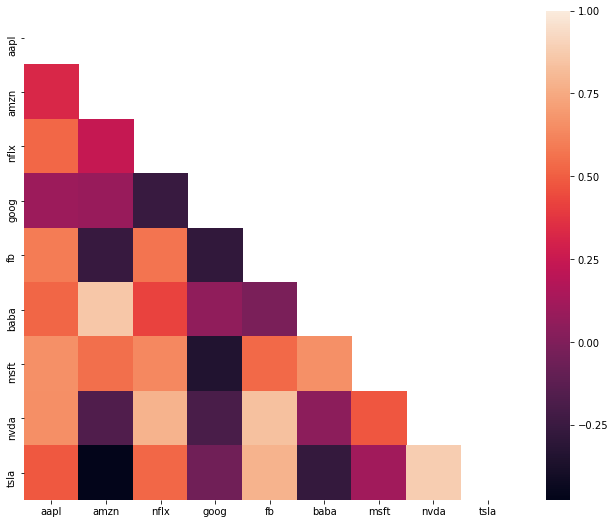

In [9]:
corr= prices.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(11,9))
sns.heatmap(corr, mask = mask)

In [10]:
prices['date'] = prices.index
bear = pd.DataFrame()
for c in tech_tickers:
    max_price = max(prices[c])
    max_date = prices[prices[c] == max_price]['date'][0]
    min_from_max = min(prices[(prices[c] < max_price) & (prices['date'] > max_date)][c])
    date_of_low = prices[prices[c] == min_from_max]['date'][0]
    percentage_drop = ((max_price-min_from_max)/max_price*100)
    
    if percentage_drop>20:
        bear_len = len(prices[(prices[c] < max_price) & (prices['date'] > max_date)][c])
    else:
        bear_len = 0

    bear.loc[c, 'max'] = max_price
    bear.loc[c, 'min after max'] = min_from_max
    bear.loc[c, 'days in bear'] = bear_len
    bear.loc[c, 'date of low'] = date_of_low
    bear.loc[c, 'date of high'] = max_date
    bear.loc[c, 'percentage drop'] = ((max_price-min_from_max)/max_price*100)
    

**Bear market**

A bear market is when stocks fall 20 percent from a recent high. 
All stocks fell in bear market after their summer highs except msft.  

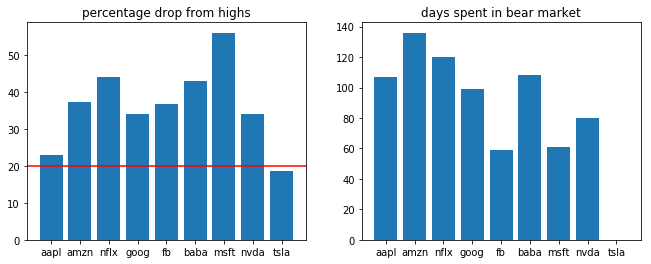

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(11,4))
ax[0].bar(tech_tickers, bear['percentage drop'])
ax[0].axhline(20, color= 'r')
ax[0].title.set_text('percentage drop from highs')
ax[1].bar(tech_tickers, bear['days in bear'])
ax[1].title.set_text('days spent in bear market')